# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Performing API Calls

In [3]:
# Creating empty lists to hold data
city_name = []
city_temp = []
city_lat = []
city_lon = []
city_hmdty = []
city_wndspd = []
city_cldns = []
city_country = []
city_maxtemp = []
date = [] 

In [4]:
# Defining base url and data units
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric" # I want my temp in Celsius and Wind Speed in meters/second

# Setting count variables 
record = 0 
query_set = 1 

print("Beginning Data Retrieval")
print("----------------------------")

# Requesting data for each city 
for city in cities: 
    
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
    
    data = requests.get(query_url + city).json()
    
    if record < 50:
        record += 1
    
    else: 
        query_set += 1
        record = 1
        
    print(f"Processing Record {record} of Set {query_set} | {city}")

    try: 
        
        city_name.append(data["name"])
        city_temp.append(data["main"]["temp"])
        city_lat.append(data["coord"]["lat"])
        city_lon.append(data["coord"]["lon"])
        city_hmdty.append(data["main"]["humidity"])
        city_wndspd.append(data["wind"]["speed"])
        city_cldns.append(data["clouds"]["all"])
        city_country.append(data["sys"]["country"])
        city_maxtemp.append(data["main"]["temp_max"])
        date.append(data["dt"])
                                                
    except: 
        
        print("City not found. Skipping...")
        
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | dunda
Processing Record 3 of Set 1 | preston
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | sisimiut
Processing Record 7 of Set 1 | adrar
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | portland
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | orbetello
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | le vauclin
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | touros
Processing Record 21 of Set 1 | attawapiskat
City not found. S

Processing Record 37 of Set 4 | saint-francois
Processing Record 38 of Set 4 | abu samrah
Processing Record 39 of Set 4 | dalbandin
Processing Record 40 of Set 4 | ankang
Processing Record 41 of Set 4 | itamaraca
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | yueyang
Processing Record 44 of Set 4 | tiksi
Processing Record 45 of Set 4 | coahuayana
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | yulara
Processing Record 48 of Set 4 | kulunda
Processing Record 49 of Set 4 | hithadhoo
Processing Record 50 of Set 4 | bandarbeyla
Processing Record 1 of Set 5 | matara
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | damietta
Processing Record 4 of Set 5 | lorengau
Processing Record 5 of Set 5 | bathsheba
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | ishigaki
Processing Record 8 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 5 | daru
Processing Record 10 of Set 

Processing Record 29 of Set 8 | elko
Processing Record 30 of Set 8 | vila franca do campo
Processing Record 31 of Set 8 | babayurt
Processing Record 32 of Set 8 | ust-omchug
Processing Record 33 of Set 8 | santa ana
Processing Record 34 of Set 8 | mananara
Processing Record 35 of Set 8 | bayan
Processing Record 36 of Set 8 | dunmore town
Processing Record 37 of Set 8 | nagato
Processing Record 38 of Set 8 | lensk
Processing Record 39 of Set 8 | bay roberts
Processing Record 40 of Set 8 | olinda
Processing Record 41 of Set 8 | borba
Processing Record 42 of Set 8 | aitape
Processing Record 43 of Set 8 | turukhansk
Processing Record 44 of Set 8 | haverfordwest
Processing Record 45 of Set 8 | beya
Processing Record 46 of Set 8 | kudahuvadhoo
Processing Record 47 of Set 8 | atar
Processing Record 48 of Set 8 | moose factory
Processing Record 49 of Set 8 | araouane
Processing Record 50 of Set 8 | winnemucca
Processing Record 1 of Set 9 | gravdal
Processing Record 2 of Set 9 | souillac
Proces

Processing Record 17 of Set 12 | iisalmi
Processing Record 18 of Set 12 | asadabad
Processing Record 19 of Set 12 | floro
Processing Record 20 of Set 12 | tando ghulam ali
Processing Record 21 of Set 12 | conceicao do mato dentro
Processing Record 22 of Set 12 | adamovka
Processing Record 23 of Set 12 | jutai
Processing Record 24 of Set 12 | lemesos
City not found. Skipping...
Processing Record 25 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 26 of Set 12 | lithgow
Processing Record 27 of Set 12 | agadez
Processing Record 28 of Set 12 | suhbaatar
Processing Record 29 of Set 12 | boshnyakovo
Processing Record 30 of Set 12 | murgab
Processing Record 31 of Set 12 | emerald
Processing Record 32 of Set 12 | boz
Processing Record 33 of Set 12 | jodhpur
Processing Record 34 of Set 12 | prince rupert
Processing Record 35 of Set 12 | muros
Processing Record 36 of Set 12 | kabul
Processing Record 37 of Set 12 | rognan
Processing Record 38 of Set 12 | charters towers
Process

### Convert Raw Data to DataFrame

Displaying the DataFrame

In [5]:
# Creating pandas dataframe
weather_df = pd.DataFrame({"City": city_name, 
                          "Country": city_country, 
                          "Date": date, 
                          "Latitude": city_lat, 
                          "Longitude": city_lon, 
                          "Temperature": city_temp, 
                          "Max. Temp.": city_maxtemp, 
                           "Humidity": city_hmdty, 
                           "Cloudiness": city_cldns, 
                           "Wind Speed": city_wndspd})

weather_df

,City,Country,Date,Latitude,Longitude,Temperature,Max. Temp.,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,1600108947,-33.59,26.89,14.68,14.68,67,0,8.78
1,Dunda,TZ,1600108947,-8.12,34.25,22.13,22.13,49,57,1.87
2,Preston,GB,1600108862,53.77,-2.72,20.56,22.00,60,80,2.60
3,Ribeira Grande,PT,1600108948,38.52,-28.70,21.00,21.00,52,20,7.70
4,Mossamedes,AO,1600108948,-15.20,12.15,18.59,18.59,84,100,3.07
...,...,...,...,...,...,...,...,...,...,...
558,Smithers,CA,1600109103,54.78,-127.17,11.00,11.00,76,90,1.00
559,Kirakira,SB,1600109130,-10.45,161.92,26.33,26.33,83,100,7.34
560,Boende,CD,1600109130,-0.22,20.87,22.71,22.71,95,100,0.59
561,Zarubino,RU,1600109131,42.63,131.09,12.75,12.75,84,0,2.99


Exporting city data to csv file

In [6]:
# Saving data as csv file in the selected folder
weather_df.to_csv("Output Data/weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.

Using the "max" function to find out if there are cities with humidity > 100%

In [7]:
weather_df["Humidity"].max()

# There are no cities above 100% humidity

100

Getting the indices of cities above 100% humidity (just to confirm)

In [8]:
humidity_df = weather_df.loc[weather_df["Humidity"] > 100]
humidity_df.index

# Result is blank because there are no cities above 100% humidity, skipping this step as instructed

Int64Index([], dtype='int64')

## Plotting the Data

In [9]:
# Setting variables to start plotting
latitude = weather_df["Latitude"]
longitude = weather_df["Longitude"]
temperature = weather_df["Temperature"]
humidity = weather_df["Humidity"]
cloudiness = weather_df["Cloudiness"]
windspeed = weather_df["Wind Speed"]

# Converting date to the appropiate format 
analysis_date = pd.to_datetime("today")
analysis_date = analysis_date.strftime("%d/%m/%y")

## Latitude vs. Temperature Plot

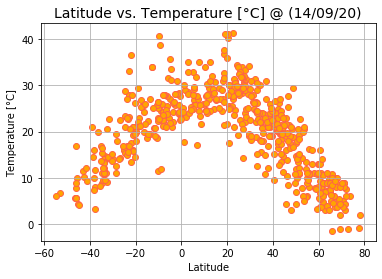

In [10]:
# Generating scatter plot
plt.scatter(latitude, temperature, marker = "o", color = "orange", edgecolors = "tomato")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Temperature [°C] @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Temperature [°C]")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_temp.png")
plt.show()

###### Observations: 
* The nearer to the equator, the higher the temperature.
* The max. temperatures registered are found in the 20-40 latitude range.

## Latitude vs. Humidity Plot

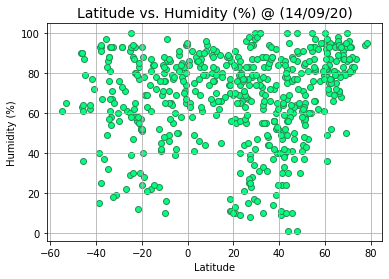

In [11]:
# Generating scatter plot
plt.scatter(latitude, humidity, marker = "o", color = "springgreen", edgecolors = "seagreen")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Humidity (%) @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_hmdty.png")
plt.show()

###### Observations: 
* There seems to be a higher humidity level in the northern hemisphere.
* Most cities' humidity values are above 60%.

## Latitude vs. Cloudiness Plot

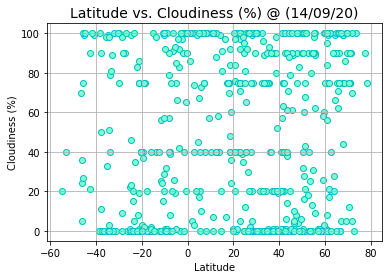

In [12]:
# Generating scatter plot
plt.scatter(latitude, cloudiness, marker = "o", color = "aquamarine", edgecolors = "c")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Cloudiness (%) @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_cldns.png")
plt.show()

###### Observations: 
* There are different cloudiness values along the whole range of latitudes, so correlation must be close to 0. 

## Latitude vs. Wind Speed Plot

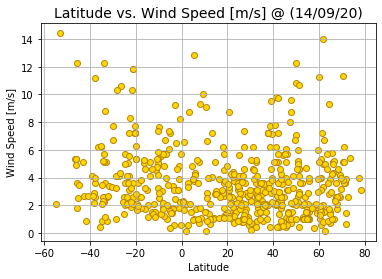

In [13]:
# Generating scatter plot
plt.scatter(latitude, windspeed, marker = "o", color = "gold", edgecolors = "darkgoldenrod")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Wind Speed [m/s] @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed [m/s]")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_wndspd.png")
plt.show()

###### Observations: 
* Wind speed ranges from 0 to 14 m/s with no clear pattern vs any latitude.
* Correlation once again seems very low on this one.

## Linear Regression

In [14]:
# Creating a function to plot the linear regression 

def lr (x, y, ax = None): 
    
    ax = ax
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    print(f"The r-squared value is: {rvalue ** 2}")
    
    regress_values = slope * x + intercept
     
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
     
    ax.plot(x, regress_values, color = "darkslateblue")

    return ax, line_eq

In [15]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = weather_df.loc[weather_df["Latitude"] >= 0,]
south_hem = weather_df.loc[weather_df["Latitude"] < 0,]

In [16]:
# Creating variables for each hemisphere
north_latitudes = north_hem["Latitude"]
north_maxtemp = north_hem["Max. Temp."]
north_hmdty = north_hem["Humidity"]
north_cldns = north_hem["Cloudiness"]
north_wndspd = north_hem["Wind Speed"]

south_latitudes = south_hem["Latitude"]
south_maxtemp = south_hem["Max. Temp."]
south_hmdty = south_hem["Humidity"]
south_cldns = south_hem["Cloudiness"]
south_wndspd = south_hem["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.6778399502764315


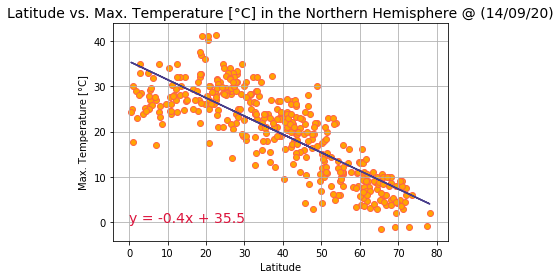

In [17]:
# Generating line regression and printing line_eq on the plot
fig, ax = plt.subplots()
ax, line_eq = lr(north_latitudes, north_maxtemp, ax)
plt.annotate(line_eq, (0, 0), fontsize = 14, color = "crimson")

# Generating scatter plot
plt.scatter(north_latitudes, north_maxtemp, marker = "o", color = "orange", edgecolors = "tomato")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Max. Temperature [°C] in the Northern Hemisphere @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature [°C]")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_maxtemp_north_hem.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5827230650704531


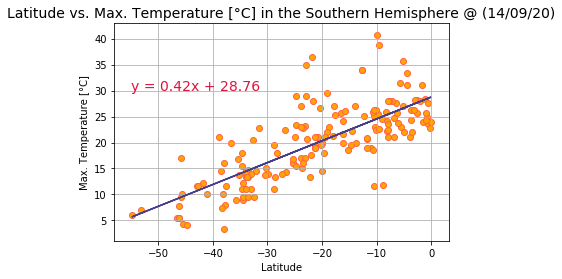

In [18]:
# Generating line regression and printing line_eq on the plot
fig, ax = plt.subplots()
ax, line_eq = lr(south_latitudes, south_maxtemp, ax)
plt.annotate(line_eq, (-55, 30), fontsize = 14, color = "crimson")

# Generating scatter plot
plt.scatter(south_latitudes, south_maxtemp, marker = "o", color = "orange", edgecolors = "tomato")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Max. Temperature [°C] in the Southern Hemisphere @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature [°C]")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_maxtemp_south_hem.png")
plt.show()

###### Observations: 
* We can confirm that the closer to latitude 0 (equator) the higher the temperature recording.
* Correlation is pretty clear once you analyze temperature per hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.029947073128827127


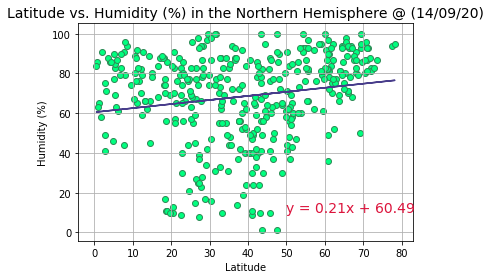

In [19]:
# Generating line regression and printing line_eq on the plot
fig, ax = plt.subplots()
ax, line_eq = lr(north_latitudes, north_hmdty, ax)
plt.annotate(line_eq, (50, 10), fontsize = 14, color = "crimson")

# Generating scatter plot
plt.scatter(north_latitudes, north_hmdty, marker = "o", color = "springgreen", edgecolors = "seagreen")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Humidity (%) in the Northern Hemisphere @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_hmdty_north_hem.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.0008288953466818976


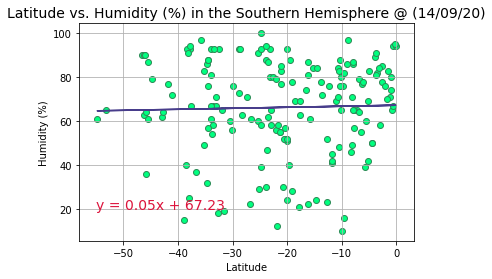

In [20]:
# Generating line regression and printing line_eq on the plot
fig, ax = plt.subplots()
ax, line_eq = lr(south_latitudes, south_hmdty, ax)
plt.annotate(line_eq, (-55, 20), fontsize = 14, color = "crimson")

# Generating scatter plot
plt.scatter(south_latitudes, south_hmdty, marker = "o", color = "springgreen", edgecolors = "seagreen")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Humidity (%) in the Southern Hemisphere @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_hmdty_south_hem.png")
plt.show()

###### Observations: 
* Northern hemisphere is clearly more humid than the southern hemisphere.
* We can confirm there is little to no correlation on latitude vs humidity in the world.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0001687077907507373


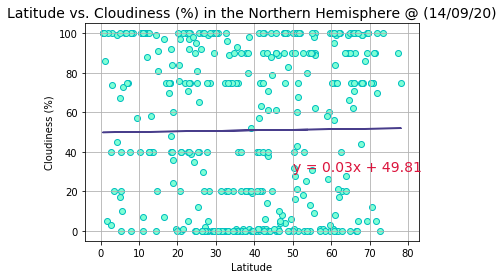

In [21]:
# Generating line regression and printing line_eq on the plot
fig, ax = plt.subplots()
ax, line_eq = lr(north_latitudes, north_cldns, ax)
plt.annotate(line_eq, (50, 30), fontsize = 14, color = "crimson")

# Generating scatter plot
plt.scatter(north_latitudes, north_cldns, marker = "o", color = "aquamarine", edgecolors = "c")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Cloudiness (%) in the Northern Hemisphere @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_cldns_north_hem.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.014611012984376568


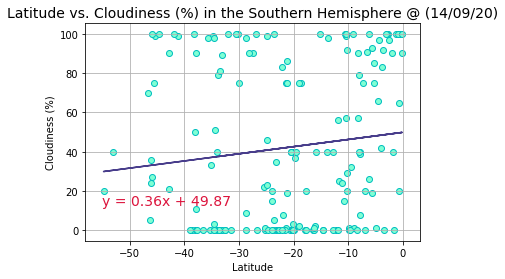

In [22]:
# Generating line regression and printing line_eq on the plot
fig, ax = plt.subplots()
ax, line_eq = lr(south_latitudes, south_cldns, ax)
plt.annotate(line_eq, (-55, 13), fontsize = 14, color = "crimson")

# Generating scatter plot
plt.scatter(south_latitudes, south_cldns, marker = "o", color = "aquamarine", edgecolors = "c")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Cloudiness (%) in the Southern Hemisphere @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_cldns_south_hem.png")
plt.show()

###### Observations: 
* Northern hemisphere seems to be more cloudy than southern hemisphere, humidity might be a reason to explain this. 
* We can confirm there is little to no correlation on latitude vs cloudiness in the world.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.003270762327412507


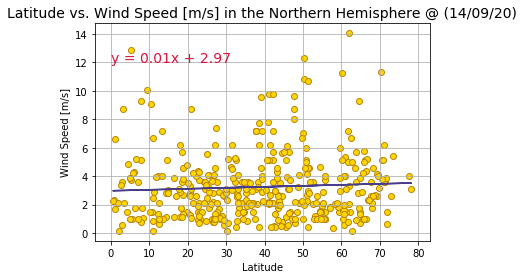

In [23]:
# Generating line regression and printing line_eq on the plot
fig, ax = plt.subplots()
ax, line_eq = lr(north_latitudes, north_wndspd, ax)
plt.annotate(line_eq, (0, 12), fontsize = 14, color = "crimson")

# Generating scatter plot
plt.scatter(north_latitudes, north_wndspd, marker = "o", color = "gold", edgecolors = "darkgoldenrod")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Wind Speed [m/s] in the Northern Hemisphere @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed [m/s]")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_wndspd_north_hem.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.018526815668441124


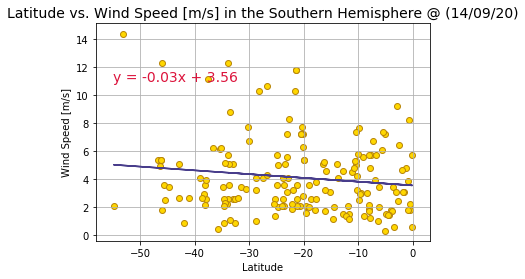

In [24]:
# Generating line regression and printing line_eq on the plot
fig, ax = plt.subplots()
ax, line_eq = lr(south_latitudes, south_wndspd, ax)
plt.annotate(line_eq, (-55, 11), fontsize = 14, color = "crimson")

# Generating scatter plot
plt.scatter(south_latitudes, south_wndspd, marker = "o", color = "gold", edgecolors = "darkgoldenrod")

# Setting title, labels, limits, etc. 
plt.title(f"Latitude vs. Wind Speed [m/s] in the Southern Hemisphere @ ({analysis_date})", size = 14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed [m/s]")
plt.grid()

# Saving file in my output folder as png
plt.savefig("Output Data/lat_vs_wndspd_south_hem.png")
plt.show()

###### Observations: 
* There are more wind speed readings on the northern hemisphere which might simply indicate that the world is more populated on its northern hemisphere.
* We can confirm there is little to no correlation on latitude vs wind speed in the world.